point clicked:  614 462
point clicked:  304 968
point clicked:  1532 1126
point clicked:  1502 468


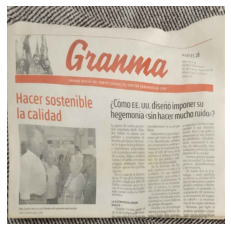

-1

In [1]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt 

from PIL import Image

A = np.zeros(shape=(8,8))
b = np.zeros(shape=(8,1))
x = np.zeros(shape=(8,1))

x_converted = np.zeros(shape=(3,3))

points_array = np.zeros(shape=(4,2))
new_points = np.array([[0,0], [0,1000], [1000,1000],[1000,0]], np.int32)


counter = 0
def mousePoints(event, x, y, flags, params):
    global counter 
    if event == cv2.EVENT_LBUTTONDOWN:
        points_array[counter][0] = x
        points_array[counter][1] = y
        counter+=1
        #print(x,y)
        print('point clicked: ', x ,y)
      
image = cv2.imread('granma.jpg') # opening image as an array
while(counter<4):
    cv2.namedWindow("Original image", cv2.WINDOW_KEEPRATIO)
    cv2.resize(image, (1000, 750)) # resizing the image to fit the screen
    cv2.imshow("Original image", image) # showing the image
    cv2.setMouseCallback("Original image", mousePoints) # saving the "clicks-points"
    cv2.waitKey(1)
    
even_counter = -1
odd_counter = -1
for i in range(0,8):        #   creating the A array of size 8 x 8
    if i % 2 == 0: # Even
        even_counter+=1
        A [i][0] = points_array[even_counter][0]
        A [i][1] = points_array[even_counter][1]
        A [i][2] = 1
        A [i][3] = 0
        A [i][4] = 0
        A [i][5] = 0
        A [i][6] = -points_array[even_counter][0] * new_points[even_counter][0]
        A [i][7] = -points_array[even_counter][1] * new_points[even_counter][0]
    else:          # Odd
        odd_counter+=1
        A [i][0] = 0
        A [i][1] = 0
        A [i][2] = 0
        A [i][3] = points_array[odd_counter][0]
        A [i][4] = points_array[odd_counter][1]
        A [i][5] = 1
        A [i][6] = -points_array[odd_counter][0] * new_points[odd_counter][1]
        A [i][7] = -points_array[odd_counter][1] * new_points[odd_counter][1]

even_counter = -1
odd_counter = -1
for i in range(0,8):    #   creating the b array of size 8 x 1
    if i % 2 == 0: # Even
        even_counter+=1
        b[i] = new_points[even_counter][0]
    else:           # Odd
        odd_counter+=1
        b[i] = new_points[odd_counter][1]
        

inverted_A = np.linalg.inv(A) # A^-1

x = inverted_A @ b  # x = A^-1 * b

x_converted[0][0] = x[0]  # x converted 8x1 --> 3x3
x_converted[0][1] = x[1]
x_converted[0][2] = x[2]
x_converted[1][0] = x[3]
x_converted[1][1] = x[4]
x_converted[1][2] = x[5]
x_converted[2][0] = x[6]
x_converted[2][1] = x[7]
x_converted[2][2] = 1


final_image = cv2.warpPerspective(image, x_converted , (1000,1000))

plt.axis("off")
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.waitKey(0)
